# **User-Item Matrix using K-nearest neighbors**

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
# ratings = pd.read_csv("/content/drive/My Drive/newmovie/ratings.csv")
# movies = pd.read_csv("/content/drive/My Drive/newmovie/movies.csv")
ratings = pd.read_csv("/content/ratings.csv")
movies = pd.read_csv("/content/movies.csv")
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [ ]:
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 610 columns]

In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  0.0  0.0  2.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  2.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        3.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 610 columns]

In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

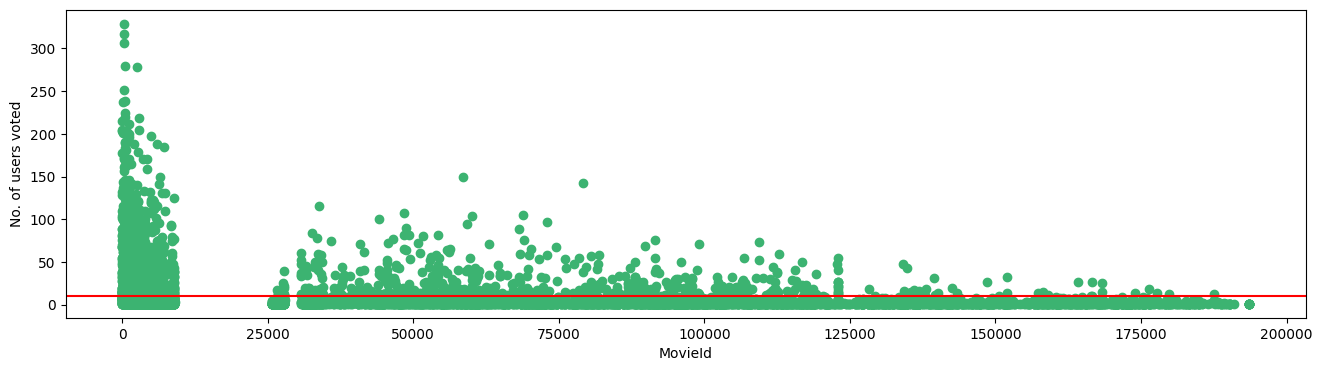

In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

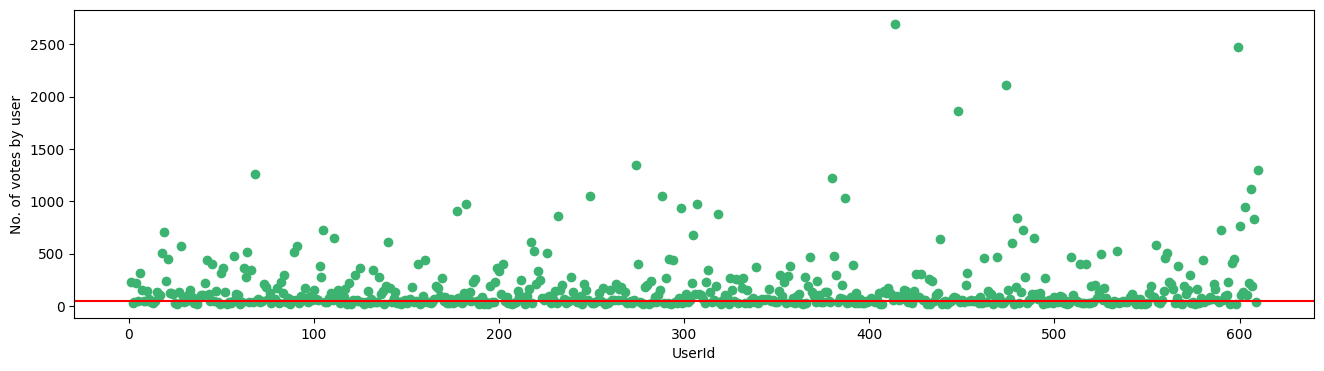

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId   1    4    6    7    10   11   15   16   17   18   ...  600  601  602  \
movieId                                                    ...                  
1        4.0  0.0  0.0  4.5  0.0  0.0  2.5  0.0  4.5  3.5  ...  2.5  4.0  0.0   
2        0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  ...  4.0  0.0  4.0   
3        4.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.5  0.0  0.0   
6        4.0  0.0  4.0  0.0  0.0  5.0  0.0  0.0  0.0  4.0  ...  0.0  0.0  3.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
174055   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0   
176371   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.0  0.0   
177765   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  4.5  0.0   
179819   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
187593   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   603  604  605  606  607  608  610  
movieId                                     
1        4.0  3.0  4.0  2.5  4.0  2.5  5.0  
2        0.0  5.0  3.5  0.0  0.0  2.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  2.0  0.0  
5        0.0  3.0  0.0  0.0  0.0  0.0  0.0  
6        4.0  3.0  0.0  0.0  0.0  0.0  5.0  
...      ...  ...  ...  ...  ...  ...  ...  
174055   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
176371   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
177765   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
179819   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
187593   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2121 rows x 378 columns]

In [ ]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]

        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]

        recommend_frame = []

        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df

    else:

        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation('Memento')

Title  Distance
1                                   Spider-Man (2002)  0.000047
2   Pirates of the Caribbean: The Curse of the Bla...  0.000047
3                                 Donnie Darko (2001)  0.000047
4                            Kill Bill: Vol. 2 (2004)  0.000047
5                              Minority Report (2002)  0.000047
6   Lord of the Rings: The Return of the King, The...  0.000043
7        Eternal Sunshine of the Spotless Mind (2004)  0.000042
8                            Kill Bill: Vol. 1 (2003)  0.000042
9       Lord of the Rings: The Two Towers, The (2002)  0.000041
10  Lord of the Rings: The Fellowship of the Ring,...  0.000041

In [ ]:
get_movie_recommendation('Iron Man')

Title      Distance
1        X-Men: First Class (2011)  1.111104e-07
2   Guardians of the Galaxy (2014)  1.106718e-07
3                District 9 (2009)  1.085074e-07
4           Sherlock Holmes (2009)  1.077268e-07
5             Kung Fu Panda (2008)  1.066761e-07
6                  Watchmen (2009)  1.061401e-07
7                 Star Trek (2009)  1.047793e-07
8                Iron Man 2 (2010)  9.618056e-08
9                    Avatar (2009)  9.313901e-08
10            Avengers, The (2012)  8.755834e-08